In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from function import text_processing

In [2]:
df = pickle.load( open( "data.p", "rb" ) )
print("Shape of the data: ",df.shape)
df.head()

Shape of the data:  (1290534, 12)


userid            location  totaltweets       tweetid  \
2            1927022036  Göttingen, Germany         78.0  1.496739e+18   
7   1350117145498173441      Chennai, India       2391.0  1.496739e+18   
20           3518882836            Pakistan       6379.0  1.496739e+18   
34   995425560825417733            Honduras       1437.0  1.496739e+18   
45             25645618       New York, USA     133271.0  1.496739e+18   

    retweetcount                                           hashtags  \
2            0.0  [{'text': 'Putin', 'indices': [13, 19]}, {'tex...   
7            1.0           [{'text': 'ரஷ்யா', 'indices': [27, 33]}]   
20          29.0          [{'text': 'Mascow', 'indices': [89, 96]}]   
34        3476.0  [{'text': 'Ucrania', 'indices': [47, 55]}, {'t...   
45         227.0  [{'text': 'Russia', 'indices': [60, 67]}, {'te...   

                   extractedts    location_clean       country  \
2   2022-02-24 06:51:34.412324  gttingen germany       germany   
7   2022-02-24 06:51:34.366602     chennai india         india   
20  2022-02-24 06:51:34.247277          pakistan      pakistan   
34  2022-02-24 06:51:34.096536          honduras      honduras   
45  2022-02-24 06:51:33.879973      new york usa  united state   

                                           text_clean      tweet_datetime  \
2   die rede von ist echt gruselig russland ist fr... 2022-02-24 06:48:02   
7                      ukrainerussie america worldwar 2022-02-24 06:48:03   
20  historic moment pm pakistan mr imran khan land... 2022-02-24 06:48:04   
34  hay que bromear esto ucrania terceraguerramund... 2022-02-24 06:48:04   
45  ka armyansk crimea ukrainewar russiawar europe... 2022-02-24 06:48:05   

    tweet_date  
2   2022-02-24  
7   2022-02-24  
20  2022-02-24  
34  2022-02-24  
45  2022-02-24

In [4]:
country_pop = pd.read_csv('../../../data/population_by_country_2020.csv')
country_pop['name_cleaned'] = [text_processing(c) for c in country_pop['Country (or dependency)']]

In [5]:
## Repartition of tweets by country, to normalize with population size / total number of tweets in the country
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


graph = df.groupby(['tweet_date', 'country']).count()['userid'].reset_index()
graph = graph[graph['userid'] > 1000]
graph = graph.merge(country_pop[['name_cleaned', 'Population (2020)']], right_on='name_cleaned', left_on='country')
graph['tweet_ratio'] = graph['userid'] / graph['Population (2020)']
graph['tweet_ratio'] = scaler.fit_transform(np.array(graph['tweet_ratio']).reshape(-1,1))
graph.index = graph['country']


In [16]:
graph = df.groupby(['country']).count()['userid'].reset_index()
# graph['tweet_ratio'].sort_values(ascending=False).head(20).plot(kind='bar')
# plt.ylabel("Tweets (#)")
# graph.plot(kind='bar')
graph.sort_values(by= 'userid', ascending=False).head(20).plot(kind='bar')

plt.show()


<AxesSubplot:xlabel='tweet_date'>

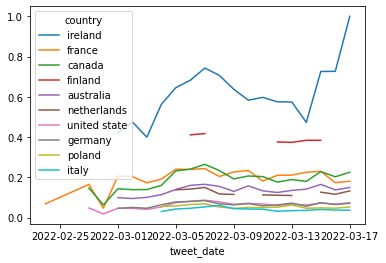

In [6]:
daily_data = graph.pivot(columns='tweet_date', values='tweet_ratio')
daily_data['total'] = daily_data.sum(axis=1)
daily_data.sort_values(by='total', ascending=False).drop('total',axis=1)[:10].T.plot()

In [7]:
## Study based on retweet
df.loc[df['retweetcount'].sort_values(ascending=False).index[:10].values]

userid  \
4452866           1296871501   
4480946            810476179   
4413604  1094907295090106368   
4744837   988112046465175552   
4714262  1241257309365559298   
4629568   975753055600865281   
4379048            347612302   
4136601            189286899   
4602752           3974978474   
4352205             55947935   

                                                  location  totaltweets  \
4452866                                          Australia      20245.0   
4480946                                    Galway, Ireland        320.0   
4413604  National Capital Region, Republic of the Phili...        329.0   
4744837                                                USA      29440.0   
4714262                                       Florida, USA     107339.0   
4629568                        Bhopal and Bengaluru, India      20833.0   
4379048                                           Colombia       3501.0   
4136601                   Northern Ireland, United Kingdom         86.0   
4602752                              Hiding out in Canada       35589.0   
4352205                                     Abuja, Nigeria      67834.0   

              tweetid  retweetcount hashtags                 extractedts  \
4452866  1.501323e+18      147637.0       []  2022-03-08 22:30:35.003837   
4480946  1.501344e+18      147636.0       []  2022-03-09 00:01:25.603152   
4413604  1.501295e+18      147634.0       []  2022-03-08 20:38:33.340985   
4744837  1.501556e+18      147633.0       []  2022-03-09 14:01:46.952528   
4714262  1.501532e+18      147632.0       []  2022-03-09 12:17:24.379821   
4629568  1.501463e+18      147631.0       []  2022-03-09 07:54:42.767606   
4379048  1.501272e+18      147629.0       []  2022-03-08 19:08:31.404686   
4136601  1.501116e+18      147629.0       []  2022-03-08 08:43:47.508198   
4602752  1.501443e+18      147628.0       []  2022-03-09 06:24:09.468603   
4352205  1.501255e+18      147627.0       []  2022-03-08 18:00:25.137508   

                                      location_clean       country  \
4452866                                    australia     australia   
4480946                               galway ireland       ireland   
4413604  national capital region republic philippine    philippine   
4744837                                          usa  united state   
4714262                                  florida usa  united state   
4629568                       bhopal bengaluru india         india   
4379048                                     colombia      colombia   
4136601              northern ireland united kingdom       ireland   
4602752                                hiding canada        canada   
4352205                                abuja nigeria       nigeria   

                                                text_clean  \
4452866  zelenskyyuas address people moving speech ive ...   
4480946  zelenskyyuas address people moving speech ive ...   
4413604  zelenskyyuas address people moving speech ive ...   
4744837  zelenskyyuas address people moving speech ive ...   
4714262  zelenskyyuas address people moving speech ive ...   
4629568  zelenskyyuas address people moving speech ive ...   
4379048  zelenskyyuas address people moving speech ive ...   
4136601  zelenskyyuas address people moving speech ive ...   
4602752  zelenskyyuas address people moving speech ive ...   
4352205  zelenskyyuas address people moving speech ive ...   

             tweet_datetime  tweet_date  
4452866 2022-03-08 22:23:14  2022-03-08  
4480946 2022-03-08 23:47:21  2022-03-08  
4413604 2022-03-08 20:34:21  2022-03-08  
4744837 2022-03-09 13:50:54  2022-03-09  
4714262 2022-03-09 12:15:33  2022-03-09  
4629568 2022-03-09 07:41:17  2022-03-09  
4379048 2022-03-08 19:02:22  2022-03-08  
4136601 2022-03-08 08:41:33  2022-03-08  
4602752 2022-03-09 06:22:54  2022-03-09  
4352205 2022-03-08 17:52:23  2022-03-08